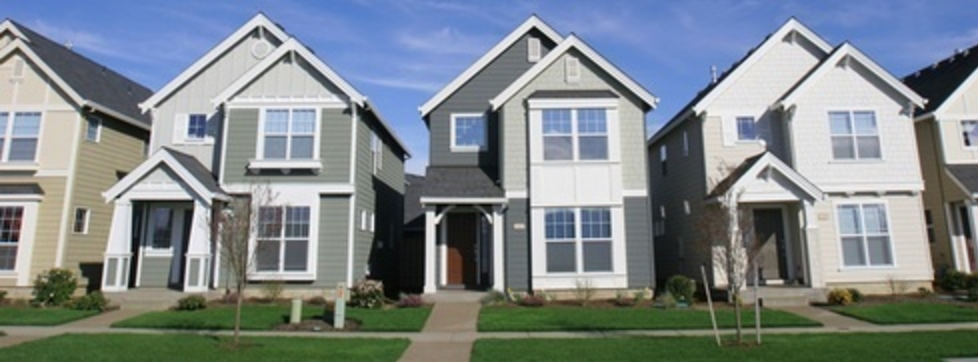

# Ames Housing Saleprice

## Problem Statement

Create a regression model where we are able to see what features affects the price of the house at sales the most.

## Executive Summary

### Contents:
- [7. Model_Benchmarks](#7.-Model-Benchmarks)
- [8. Model_Tuning](#8.-Model-Tuning)


Links:
[Kaggle challenge link](https://www.kaggle.com/c/dsi-us-6-project-2-regression-challenge/data)

# 7. Model Benchmarks

In [1]:
#Imports:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, Lasso, LassoCV, ElasticNet, ElasticNetCV
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score
plt.style.use('ggplot')
from IPython.display import display
pd.set_option('display.max_rows', 3000)
pd.set_option('display.max_columns', 200)
pd.set_option('display.width', 1000)

In [2]:
# Importing cleaned dataset for Pre Processing
df_train= pd.read_csv('../datasets/train_preprocess.csv')

df_train.shape

(2018, 148)

## 7.1 Train Split Test

In [3]:
col_keys = df_train.drop(columns = ['Id','SalePrice']).keys()
col_keys

Index(['Overall Qual', 'Year Built', 'Year Remod/Add', 'Exter Qual', 'Bsmt Qual', 'Central Air', '1st Flr SF', 'Gr Liv Area', 'Full Bath', 'Kitchen Qual',
       ...
       'Heating_GasW', 'Heating_Grav', 'Heating_OthW', 'Heating_Wall', 'Garage Type_2Types', 'Garage Type_Attchd', 'Garage Type_Basment', 'Garage Type_BuiltIn', 'Garage Type_CarPort', 'Garage Type_Detchd'], dtype='object', length=146)

In [4]:
y = df_train['SalePrice']
X = df_train[col_keys]

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state = 42, test_size = 0.2)

In [6]:
print('X_train shape: ' + str(X_train.shape))
print('X_test shape: ' + str(X_test.shape))
print('y_train shape: ' + str(y_train.shape))
print('y_test shape: ' + str(y_test.shape))

X_train shape: (1614, 146)
X_test shape: (404, 146)
y_train shape: (1614,)
y_test shape: (404,)


## 7.1.1 Linear

In [7]:
lr = LinearRegression()

In [8]:
lr.fit(X_train, y_train)

LinearRegression()

In [9]:
print("Train Score(Lr): " + str(lr.score(X_train,y_train)))
print("Test Score(Lr): " + str(lr.score(X_test,y_test)))
print('Test Data Estimated score(Lr) ' + str(cross_val_score(lr, X_train, y_train, cv = 5).mean()))

Train Score(Lr): 0.9046410762681387
Test Score(Lr): 0.8801945107158451
Test Data Estimated score(Lr) -1.7156936372899276e+20


In [10]:
print("Train MSE(Lr) " + str(mean_squared_error(y_train, lr.predict(X_train))))
print('Test MSE(Lr) ' + str(mean_squared_error(y_test, lr.predict(X_test))))
                              
print('Test Data Estimated MSE(Lr) ' + str(-cross_val_score(lr, X_train, y_train, 
                                                            cv = 5, scoring = 'neg_mean_squared_error').mean()))

Train MSE(Lr) 504240249.598513
Test MSE(Lr) 673853476.6039604
Test Data Estimated MSE(Lr) 9.201473465492412e+29


In [11]:
def model_evaluation_plots(model, X_train, y_train, X_test, y_test):
    y_train_preds = model.predict(X_train)
    y_test_preds = model.predict(X_test)
    
    plt.figure(figsize=(12,6))
    # Residuals
    plt.subplot(121)
    plt.scatter(y_train_preds, y_train_preds - y_train, c='tomato', marker='o', label='Training data')
    plt.scatter(y_test_preds, y_test_preds - y_test, c='gold', marker='s', label='Validation data')
    plt.title('Residuals')
    plt.xlabel('Predicted values')
    plt.ylabel('Residuals')
    plt.legend(loc='upper left')
    plt.hlines(y=0, xmin=y_train.min(), xmax=y_train.max(), color='blue')

    # Predictions
    plt.subplot(122)
    plt.scatter(y_train_preds, y_train, c='tomato', marker='o', label='Training data')
    plt.scatter(y_test_preds, y_test, c='gold', marker='s', label='Validation data')
    plt.title('Predictions')
    plt.xlabel('Predicted values')
    plt.ylabel('Real values')
    plt.legend(loc='upper left')
    plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], c='blue')
    plt.tight_layout()
    plt.show()

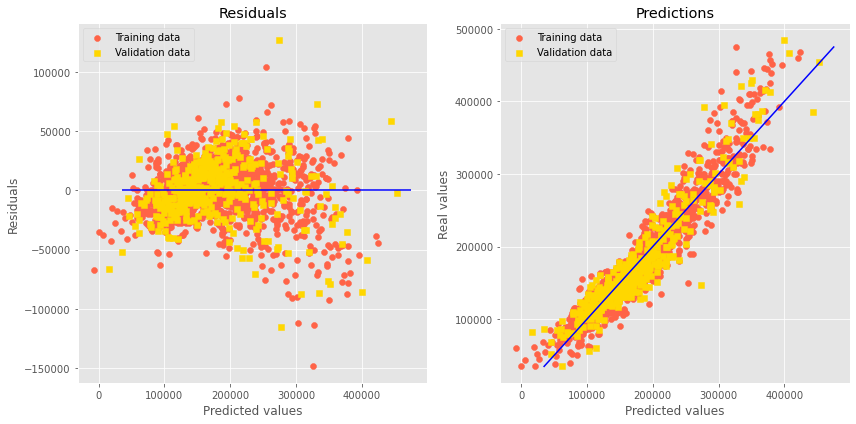

In [12]:
model_evaluation_plots(lr, X_train, y_train, X_test, y_test)

### 7.1.1 comments 
- Terrible result, models is severely overfitted resulting in a negative r2 value
- Will use Ridge, Lasso and Elastic model to regularize data

## 7.1.2 Ridge

In [13]:
ridge = RidgeCV(alphas = np.linspace(0.1,10,100))

In [14]:
ridge.fit(X_train, y_train);

In [15]:
ridge.alpha_

3.2

In [16]:
print("Train Score(L1): " + str(ridge.score(X_train,y_train)))
print("Test Score(L1): " + str(ridge.score(X_test,y_test)))
print('Test Data Estimated score(L1) ' + str(cross_val_score(ridge, X_train, y_train, cv = 5).mean()))

Train Score(L1): 0.9015148949175694
Test Score(L1): 0.8833660188259178
Test Data Estimated score(L1) 0.8822617935802223


In [17]:
print("Train RMSE(L1) " + str(np.sqrt(mean_squared_error(y_train, ridge.predict(X_train)))))
print('Test RMSE(L1) ' + str(np.sqrt(mean_squared_error(y_test, ridge.predict(X_test)))))
                              
print('Test Data Estimated RMSE(L1) ' + str(np.sqrt(-cross_val_score(ridge, X_train, y_train, 
                                                            cv = 5, scoring = 'neg_mean_squared_error').mean())))

Train RMSE(L1) 22820.40567198617
Test RMSE(L1) 25612.792324178954
Test Data Estimated RMSE(L1) 24939.25747830686


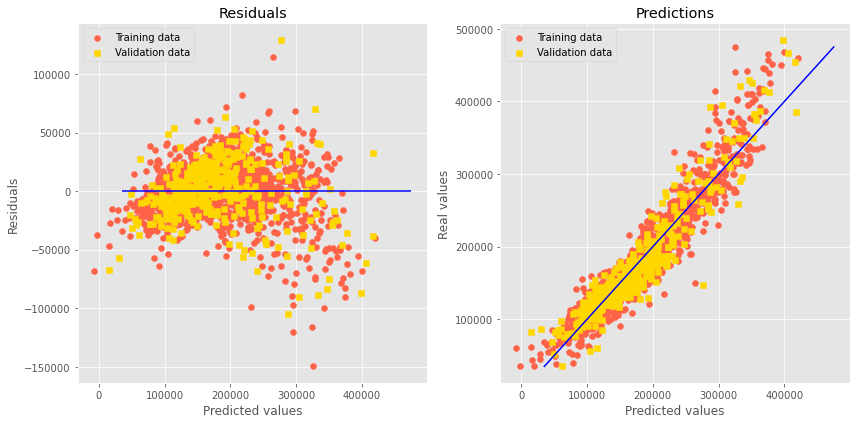

In [18]:
model_evaluation_plots(ridge, X_train, y_train, X_test, y_test)

# 7.1.3 Lasso

In [19]:
lasso = LassoCV(alphas = np.linspace(0.1,10,100), max_iter = 4000)

In [20]:
lasso.fit(X_train, y_train);

In [21]:
lasso.alpha_

10.0

In [22]:
print("Train Score(L2): " + str(lasso.score(X_train,y_train)))
print("Test Score(L2): " + str(lasso.score(X_test,y_test)))
print('Test Data Estimated score(L2) ' + str(cross_val_score(lasso, X_train, y_train, cv = 5).mean()))

Train Score(L2): 0.9040199240972676
Test Score(L2): 0.8824159973080026
Test Data Estimated score(L2) 0.8810569788654362


In [23]:
print("Train RMSE(L2) " + str(np.sqrt(mean_squared_error(y_train, lasso.predict(X_train)))))
print('Test RMSE(L2) ' + str(np.sqrt(mean_squared_error(y_test, lasso.predict(X_test)))))
                              
print('Test Data Estimated RMSE(L2) ' + str(np.sqrt(-cross_val_score(lasso, X_train, y_train, 
                                                            cv = 5, scoring = 'neg_mean_squared_error').mean())))

Train RMSE(L2) 22528.310782847457
Test RMSE(L2) 25716.893011377415
Test Data Estimated RMSE(L2) 25070.653558695358


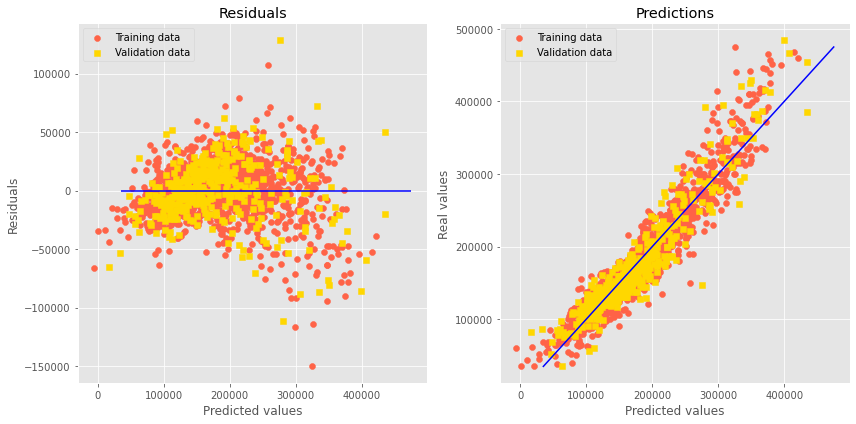

In [24]:
model_evaluation_plots(lasso, X_train, y_train, X_test, y_test)

# 7.1.4 Elastic Net

In [25]:
elasticnet = ElasticNetCV(alphas = np.linspace(0.1,10,100), max_iter = 1500)

In [26]:
elasticnet.fit(X_train, y_train);

In [27]:
elasticnet.alpha_

0.1

In [28]:
print("Train Score(EN): " + str(elasticnet.score(X_train,y_train)))
print("Test Score(EN): " + str(elasticnet.score(X_test,y_test)))
print('Test Data Estimated score(EN) ' + str(cross_val_score(elasticnet, X_train, y_train, cv = 5).mean()))

Train Score(EN): 0.8829923565601356
Test Score(EN): 0.8720878862924639
Test Data Estimated score(EN) 0.8743240319520776


In [29]:
print("Train RMSE(EN) " + str(np.sqrt(mean_squared_error(y_train, elasticnet.predict(X_train)))))
print('Test RMSE(EN) ' + str(np.sqrt(mean_squared_error(y_test, elasticnet.predict(X_test)))))
                              
print('Test Data Estimated RMSE(EN) ' + str(np.sqrt(-cross_val_score(elasticnet, X_train, y_train, 
                                                            cv = 5, scoring = 'neg_mean_squared_error').mean())))

Train RMSE(EN) 24873.97540045211
Test RMSE(EN) 26822.55941001333
Test Data Estimated RMSE(EN) 25760.18385008399


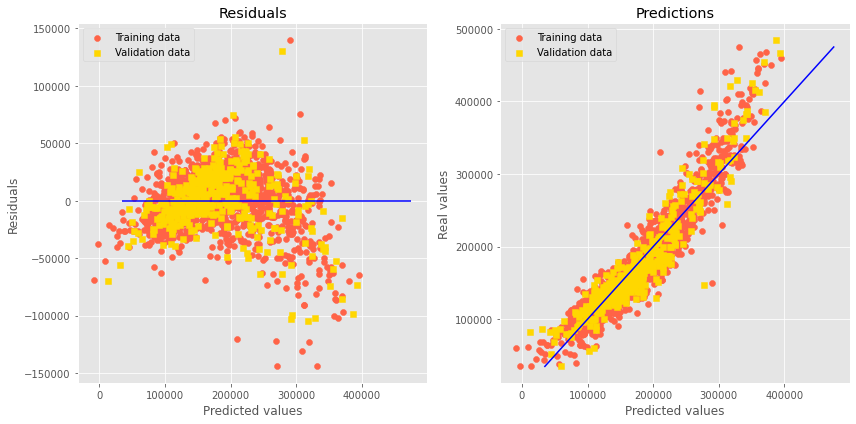

In [30]:
model_evaluation_plots(elasticnet, X_train, y_train, X_test, y_test)

# 7 comments

- the prediction is better after regularising
- all 3 models are producing very similar RMSE and R2 scores
- there seems to be a spread of residuals in all 3 models
- the data seem to move away from best fit line at higher prices

# 8 Model Tuning

- Will look at the top 50 coefficient to see how they affect SalePrice

In [31]:
coef = pd.Series(lasso.coef_, index = X_train.columns)
coef.sort_values(ascending = False, inplace = True)
coef[abs(coef) > 0][:50] #top 50 coefficient features, regardless of positive or negative

Neighborhood_GrnHill     107566.364716
Neighborhood_NridgHt      44591.842331
Neighborhood_StoneBr      41742.873510
Neighborhood_BrDale       41320.466716
Neighborhood_NoRidge      39181.956937
Condition 2_PosN          37086.227055
Condition 2_PosA          26981.165813
Exterior 1st_BrkFace      21350.270862
Bldg Type_1Fam            20925.068110
Condition 1_PosN          19166.337959
Neighborhood_MeadowV      18172.453649
Condition 1_PosA          17752.014845
Neighborhood_NPkVill      17094.072006
Bldg Type_2fmCon          16895.428579
Exterior 2nd_AsphShn      16866.308812
Land Contour_HLS          16438.711915
Neighborhood_ClearCr      15163.279345
Neighborhood_Veenker      14794.767336
Neighborhood_Somerst      14239.957403
MS Zoning_RH              14126.677446
Land Contour_Low          13078.681210
Exterior 2nd_CmentBd      12739.768499
House Style_2.5Unf        11749.016219
1st Flr SF                10723.016639
Neighborhood_Crawfor       9513.657050
Total Flr SF             

- interestingly, the top 50 features all seems to be positively contributing to the SalePrice

In [32]:
# using top 50 without absolute function as it does not matter at this point
gd_coef = coef[:50].keys()

#keeping values with high coefficient
len(gd_coef)

50

In [33]:
X_train_filtered = X_train[gd_coef]
X_test_filtered = X_test[gd_coef]

# 8.1 Linear

In [34]:
lr = LinearRegression()
lr.fit(X_train_filtered, y_train)

LinearRegression()

In [35]:
print("Train Score(Lr): " + str(lr.score(X_train_filtered,y_train)))
print("Test Score(Lr): " + str(lr.score(X_test_filtered,y_test)))
print('Test Data Estimated score(Lr) ' + str(cross_val_score(lr, X_train_filtered, y_train, cv = 5).mean()))

Train Score(Lr): 0.8946025601979153
Test Score(Lr): 0.8774485638757396
Test Data Estimated score(Lr) 0.8811785545382758


In [36]:
print("Train RMSE(Lr) " + str(np.sqrt(mean_squared_error(y_train, lr.predict(X_train_filtered)))))
print('Test RMSE(Lr) ' + str(np.sqrt(mean_squared_error(y_test, lr.predict(X_test_filtered)))))
                              
print('Test Data Estimated RMSE(Lr) ' + str(np.sqrt(-cross_val_score(lr, X_train_filtered, y_train, 
                                                            cv = 5, scoring = 'neg_mean_squared_error').mean())))

Train RMSE(Lr) 23607.66941415393
Test RMSE(Lr) 26254.489645680773
Test Data Estimated RMSE(Lr) 25054.77668730507


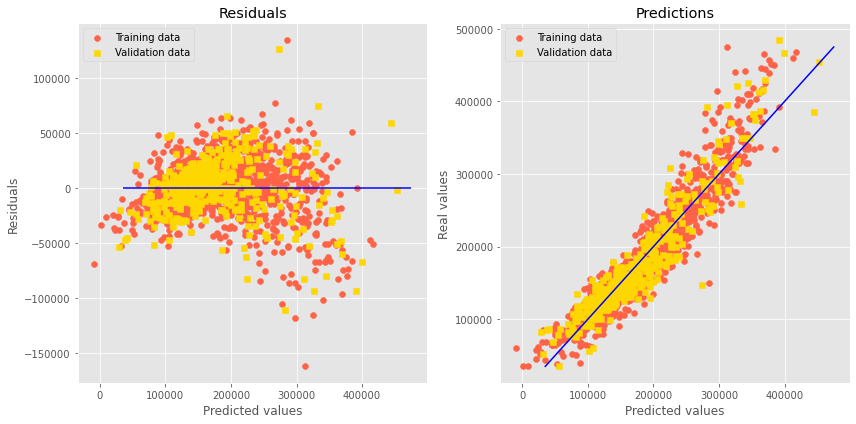

In [37]:
model_evaluation_plots(lr, X_train_filtered, y_train, X_test_filtered, y_test)

##  8.1 Comments

- Tried with 25, 30, 40, 50, 55 features for test, 50 features returns the best results
- using only the top 50 features seems to improve the RMSE and R2 scores
- Trying with Lasso model

# 8.2 Lasso

In [38]:
lasso = LassoCV(alphas = np.linspace(0.1,10,100), max_iter = 1500)

In [39]:
lasso.fit(X_train_filtered, y_train);

In [40]:
lasso.alpha_

10.0

In [41]:
print("Train Score(L2): " + str(lasso.score(X_train_filtered,y_train)))
print("Test Score(L2): " + str(lasso.score(X_test_filtered,y_test)))
print('Test Data Estimated score(L2) ' + str(cross_val_score(lasso, X_train_filtered, y_train, cv = 5).mean()))

Train Score(L2): 0.8944114435990236
Test Score(L2): 0.8781368025948777
Test Data Estimated score(L2) 0.8815055604818973


In [42]:
print("Train RMSE(L2) " + str(np.sqrt(mean_squared_error(y_train, lasso.predict(X_train_filtered)))))
print('Test RMSE(L2) ' + str(np.sqrt(mean_squared_error(y_test, lasso.predict(X_test_filtered)))))
                              
print('Test Data Estimated RMSE(L2) ' + str(np.sqrt(-cross_val_score(lasso, X_train_filtered, y_train, 
                                                            cv = 5, scoring = 'neg_mean_squared_error').mean())))

Train RMSE(L2) 23629.063548743303
Test RMSE(L2) 26180.664330425243
Test Data Estimated RMSE(L2) 25018.56578625517


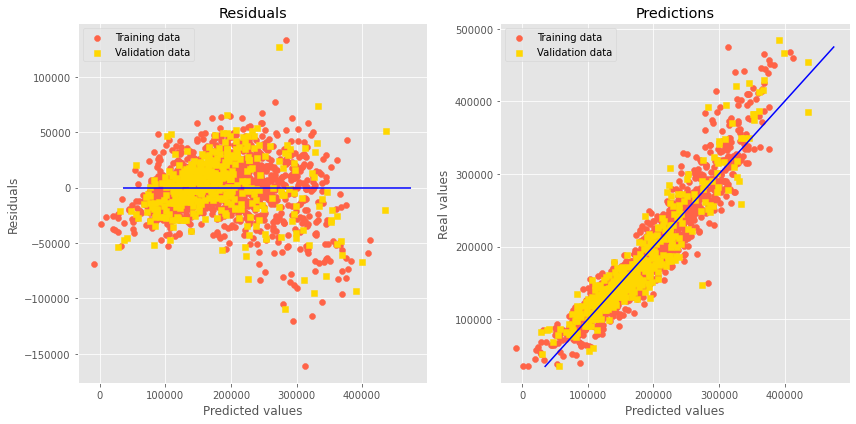

In [43]:
model_evaluation_plots(lasso, X_train_filtered, y_train, X_test_filtered, y_test)

- Not surprisingly, the RMSE and R2 scores are very similar to Linear model
- the prediction are still not that good at higher pricest

# 8.3 Further Model tuning

- Polynomial features, to see if we can increase accuracy of the model

# 8.3.1 Heatmap for features

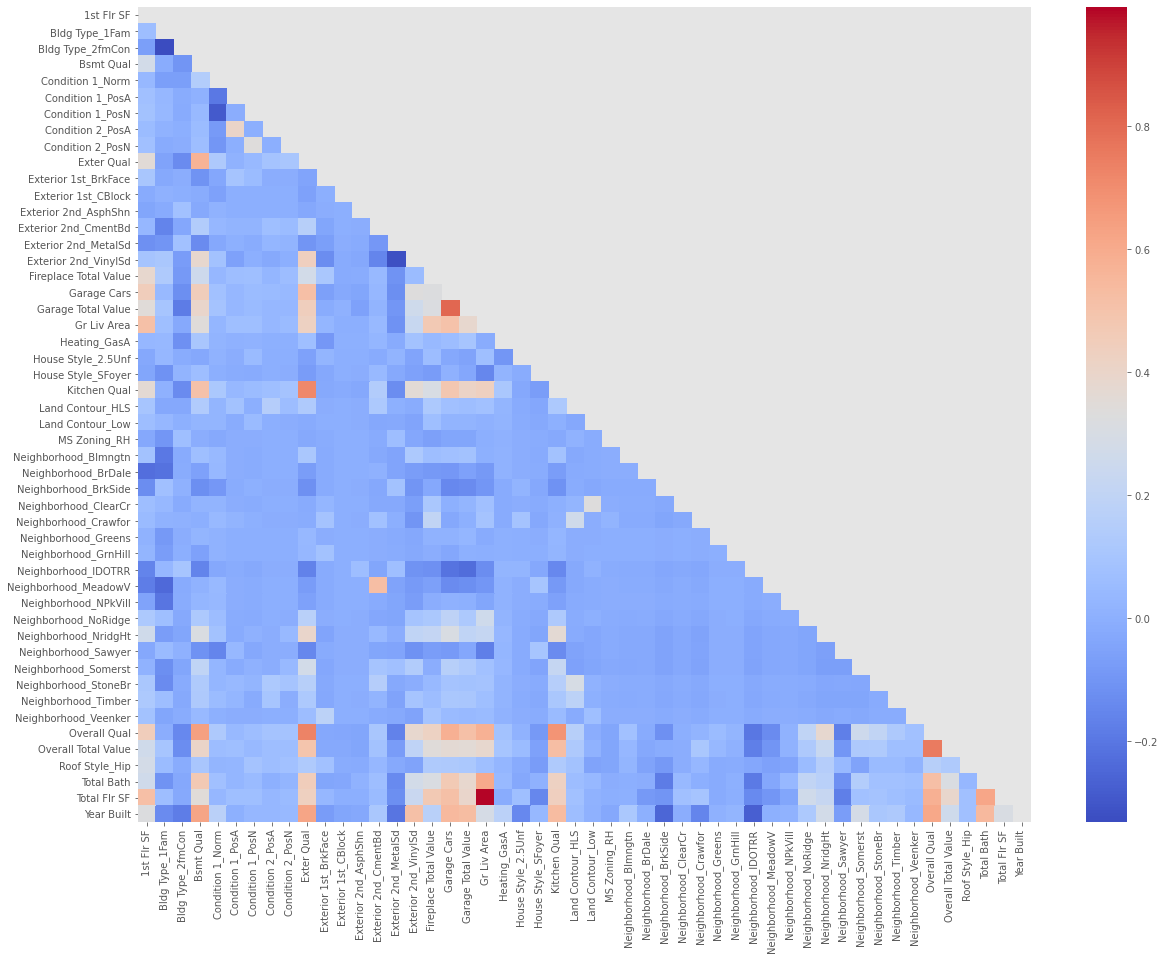

In [44]:
coef_sort = [i for i in gd_coef.sort_values()]
plt.figure(figsize= (20, 15))
mask = (np.triu(np.ones_like(df_train[coef_sort].corr(),
                             dtype=np.bool)))
sns.heatmap(df_train[coef_sort].corr(),
            annot=False, mask = mask, 
            fmt='.1g', cmap='coolwarm');

Very few patches of data with Correlation to each other, will plot out small heatmap to see

## 8.3.2 Garage related features with high coef

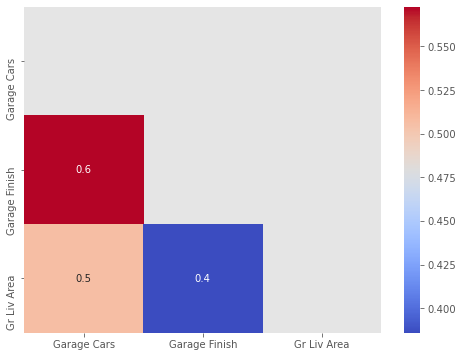

In [45]:
garage_coef = ['Garage Cars', 
               'Garage Finish', 'Gr Liv Area']
plt.figure(figsize= (8, 6))
mask = (np.triu(np.ones_like(df_train[garage_coef].corr(),
                             dtype=np.bool)))
sns.heatmap(df_train[garage_coef].corr(),
            annot=True, mask = mask, 
            fmt='.1g', cmap='coolwarm');

In [46]:
y = df_train['SalePrice']
X = df_train[garage_coef]

In [47]:
print("Garage Features Train Score(L2): " + str(cross_val_score(lasso, X = X, y = y, cv = 5).mean()))

Garage Features Train Score(L2): 0.644660252911432


In [48]:
poly = PolynomialFeatures(include_bias=False)

In [49]:
X_poly = poly.fit_transform(X)

In [50]:
pd.DataFrame(X_poly, columns=poly.get_feature_names(garage_coef));

In [51]:
print("Polynomial Garage Features Train Score(L2): " + str(cross_val_score(lasso, X_poly, y, cv=5).mean()))

Polynomial Garage Features Train Score(L2): 0.71793754505921


- R2 score improved after using polynomial features

##  8.3.3 Adding in relevant Polynomial features to training and testing dataset

### 8.3.3 Creating Polynomial Features

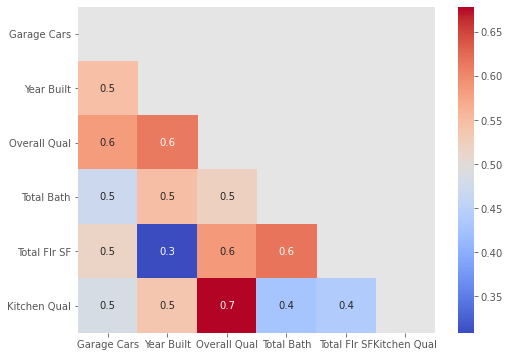

In [52]:
poly_coef = ['Garage Cars','Year Built','Overall Qual',
            'Total Bath', 'Total Flr SF', 'Kitchen Qual']
plt.figure(figsize= (8, 6))
mask = (np.triu(np.ones_like(df_train[poly_coef].corr(),
                             dtype=np.bool)))
sns.heatmap(df_train[poly_coef].corr(),
            annot=True, mask = mask, 
            fmt='.1g', cmap='coolwarm');

In [53]:
y = df_train['SalePrice']
X = df_train[poly_coef]

In [54]:
print("Garage & Total & Year Features Train Score(L2): " + str(cross_val_score(lasso, X = X, y = y, cv = 5).mean()))

Garage & Total & Year Features Train Score(L2): 0.7908862488959102


In [55]:
poly = PolynomialFeatures(degree = 2, interaction_only = True, include_bias=False)

In [56]:
X_poly = poly.fit_transform(X)

In [57]:
print("Polynomial Garage & Total & Year Features Train Score(L2): " + str(cross_val_score(lasso, X_poly, y, cv=5).mean()))

Polynomial Garage & Total & Year Features Train Score(L2): 0.84688375423209


- R2 score improved after using polynomial features

## 8.3.4 adding Polynomial Features into training dataset

In [58]:
poly_features = pd.DataFrame(X_poly, columns=poly.get_feature_names(poly_coef))
poly_features.drop(poly_coef, axis = 1, inplace = True)
poly_features.shape

(2018, 15)

In [59]:
poly_features.columns

Index(['Garage Cars Year Built', 'Garage Cars Overall Qual', 'Garage Cars Total Bath', 'Garage Cars Total Flr SF', 'Garage Cars Kitchen Qual', 'Year Built Overall Qual', 'Year Built Total Bath', 'Year Built Total Flr SF', 'Year Built Kitchen Qual', 'Overall Qual Total Bath', 'Overall Qual Total Flr SF', 'Overall Qual Kitchen Qual', 'Total Bath Total Flr SF', 'Total Bath Kitchen Qual', 'Total Flr SF Kitchen Qual'], dtype='object')

In [60]:
df_train_poly = pd.concat([df_train, poly_features], axis = 1)
df_train_poly.shape

(2018, 163)

# 8.4 Lasso Model with Polynomial Features

In [61]:
col_keys = df_train_poly.drop(columns = ['Id','SalePrice']).keys()
col_keys

Index(['Overall Qual', 'Year Built', 'Year Remod/Add', 'Exter Qual', 'Bsmt Qual', 'Central Air', '1st Flr SF', 'Gr Liv Area', 'Full Bath', 'Kitchen Qual',
       ...
       'Year Built Overall Qual', 'Year Built Total Bath', 'Year Built Total Flr SF', 'Year Built Kitchen Qual', 'Overall Qual Total Bath', 'Overall Qual Total Flr SF', 'Overall Qual Kitchen Qual', 'Total Bath Total Flr SF', 'Total Bath Kitchen Qual', 'Total Flr SF Kitchen Qual'], dtype='object', length=161)

In [62]:
y = df_train_poly['SalePrice']
X = df_train_poly[col_keys]

In [63]:
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state = 42, test_size = 0.2)

In [64]:
print('X_train shape: ' + str(X_train.shape))
print('X_test shape: ' + str(X_test.shape))
print('y_train shape: ' + str(y_train.shape))
print('y_test shape: ' + str(y_test.shape))

X_train shape: (1614, 161)
X_test shape: (404, 161)
y_train shape: (1614,)
y_test shape: (404,)


In [65]:
lasso = LassoCV(alphas = np.linspace(0.1,10,100), max_iter = 2000)
lasso.fit(X_train, y_train);
lasso.alpha_

10.0

In [66]:
print("Train Score(L2): " + str(lasso.score(X_train,y_train)))
print("Test Score(L2): " + str(lasso.score(X_test,y_test)))
print('Test Data Estimated score(L2) ' + str(cross_val_score(lasso, X_train, y_train, cv = 5).mean()))

Train Score(L2): 0.9277988739974932
Test Score(L2): 0.9091572748497506
Test Data Estimated score(L2) 0.9080996115971021


In [67]:
print("Train RMSE(L2) " + str(np.sqrt(mean_squared_error(y_train, lasso.predict(X_train)))))
print('Test RMSE(L2) ' + str(np.sqrt(mean_squared_error(y_test, lasso.predict(X_test)))))
                              
print('Test Data Estimated RMSE(L2) ' + str(np.sqrt(-cross_val_score(lasso, X_train, y_train, 
                                                            cv = 5, scoring = 'neg_mean_squared_error').mean())))

Train RMSE(L2) 19539.348073139485
Test RMSE(L2) 22604.21633473202
Test Data Estimated RMSE(L2) 22038.722708657482


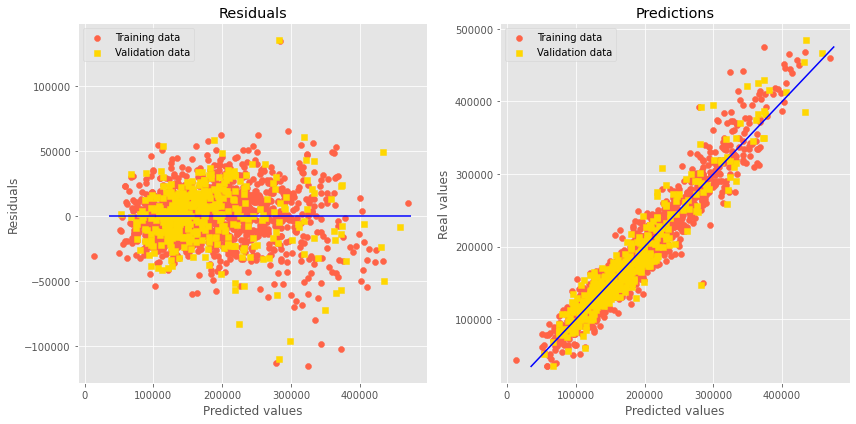

In [68]:
model_evaluation_plots(lasso, X_train, y_train, X_test, y_test)

### 8.3 comments :
- Results improved after inserting polynomial features
- RMSE scores are lower, and R2 scores are slighlty higher
- Residual plot also see less spread of the data

# 8.4  Lasso and Ridge Model after removing low coef columns

- filtering out top coefficients features

In [69]:
coef = pd.Series(lasso.coef_, index = X_train.columns)
coef.sort_values(ascending = False, inplace = True) # sort value by importance of value

In [70]:
coef_sort = [i for i in coef[coef != 0][:50].keys().sort_values()] # creating list of coef not equal to zero

- Choosing features that is contributing to saleprice after regularisation

## 8.4.1 Lasso model

In [71]:
y = df_train_poly['SalePrice']
X = df_train_poly[coef_sort]

In [72]:
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state = 42, test_size = 0.2)

In [73]:
print('X_train shape: ' + str(X_train.shape))
print('X_test shape: ' + str(X_test.shape))
print('y_train shape: ' + str(y_train.shape))
print('y_test shape: ' + str(y_test.shape))

X_train shape: (1614, 50)
X_test shape: (404, 50)
y_train shape: (1614,)
y_test shape: (404,)


In [74]:
re_lasso = LassoCV(alphas = np.linspace(0.1,10,100), max_iter = 3000)
re_lasso.fit(X_train, y_train);
re_lasso.alpha_

10.0

In [75]:
print("Train Score(L2): " + str(re_lasso.score(X_train,y_train)))
print("Test Score(L2): " + str(re_lasso.score(X_test,y_test)))
print('Test Data Estimated score(L2) ' + str(cross_val_score(re_lasso, X_train, y_train, cv = 5).mean()))

Train Score(L2): 0.9192537907833207
Test Score(L2): 0.9006591213963071
Test Data Estimated score(L2) 0.9102620327996285


In [76]:
print("Train RMSE(L2) " + str(np.sqrt(mean_squared_error(y_train, re_lasso.predict(X_train)))))
print('Test RMSE(L2) ' + str(np.sqrt(mean_squared_error(y_test, re_lasso.predict(X_test)))))
                              
print('Test Data Estimated RMSE(L2) ' + str(np.sqrt(-cross_val_score(re_lasso, X_train, y_train, 
                                                            cv = 5, scoring = 'neg_mean_squared_error').mean())))

Train RMSE(L2) 20663.274996114727
Test RMSE(L2) 23637.87199292534
Test Data Estimated RMSE(L2) 21779.12401287237


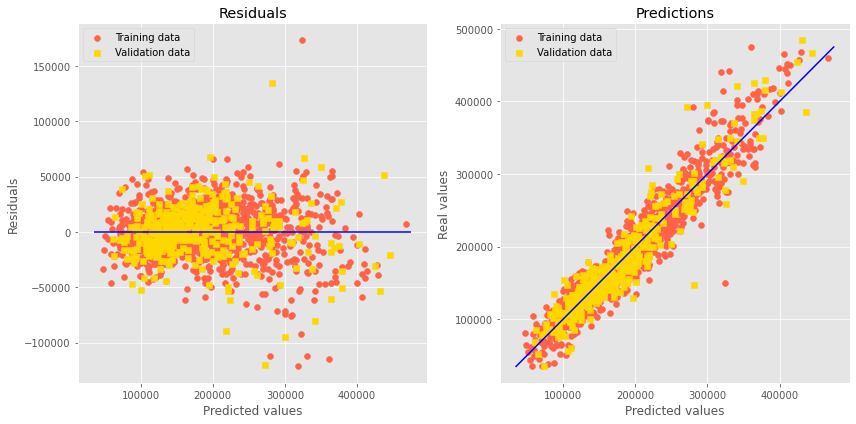

In [77]:
model_evaluation_plots(re_lasso, X_train, y_train, X_test, y_test)

## 8.4.2 Ridge Model

In [78]:
re_ridge = RidgeCV(alphas = np.linspace(0.1,10,100))

In [79]:
re_ridge.fit(X_train, y_train);

In [80]:
re_ridge.alpha_

0.4

In [81]:
print("Train Score(L1): " + str(re_ridge.score(X_train,y_train)))
print("Test Score(L1): " + str(re_ridge.score(X_test,y_test)))
print('Test Data Estimated score(L1) ' + str(cross_val_score(re_ridge, X_train, y_train, cv = 5).mean()))

Train Score(L1): 0.919274331832834
Test Score(L1): 0.900823707600296
Test Data Estimated score(L1) 0.9094608516920536


In [82]:
print("Train RMSE(L1) " + str(np.sqrt(mean_squared_error(y_train, re_ridge.predict(X_train)))))
print('Test RMSE(L1) ' + str(np.sqrt(mean_squared_error(y_test, re_ridge.predict(X_test)))))
                              
print('Test Data Estimated RMSE(L1) ' + str(np.sqrt(-cross_val_score(re_ridge, X_train, y_train, 
                                                            cv = 5, scoring = 'neg_mean_squared_error').mean())))

Train RMSE(L1) 20660.646560947014
Test RMSE(L1) 23618.28247234186
Test Data Estimated RMSE(L1) 21876.55053728956


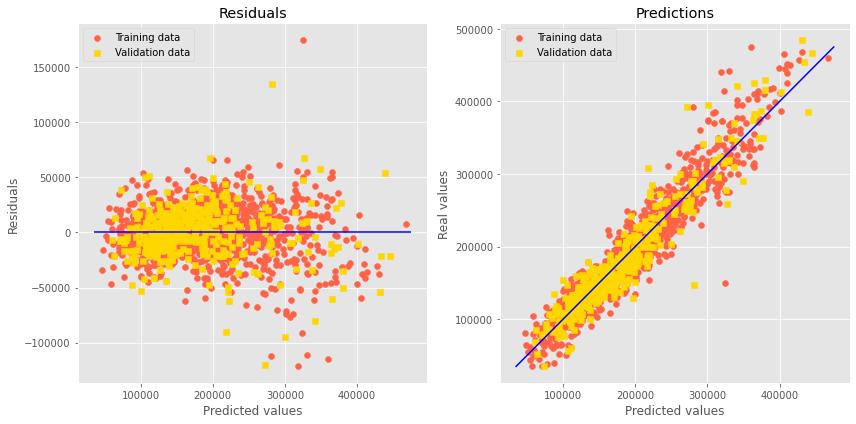

In [83]:
model_evaluation_plots(re_ridge, X_train, y_train, X_test, y_test)

# 8.4 Comments
- despite an increase in RMSE, the gap between the R2 scores are smaller
- it can be inferred that the accuracy to unknown data is improved
- will use the top 50 coefficient features for the final model

# Kaggle Submission

- will submit final prediction of lasso and ridge models to Kaggle

# Preparing Test Data

In [84]:
# importing data for unknown test data prediction
df_test= pd.read_csv('../datasets/test_preprocess.csv')

df_test.shape

(879, 141)

In [85]:
# in test - train
df_test_col = df_test.columns.difference(df_train.columns)

# in train not in test
df_train_col =  df_train.columns.difference(df_test.columns)

# dropping values not in training set
df_test.drop(columns = df_test_col, inplace = True)

# adding values in training set not in testing set
for i in df_train_col:
    df_test[i] = 0
    
#filling in possible null values    
df_test.fillna(0 ,inplace = True)

#Creating Polynomial Features for unknown data
X_df_test = df_test[poly_coef]
X_test_poly = poly.fit_transform(X_df_test)

#Creating Polynomial Dataframe to add into test data
poly_test_features = pd.DataFrame(X_test_poly, columns=poly.get_feature_names(poly_coef))
poly_test_features.drop(poly_coef, axis = 1, inplace = True)

#adding features together for prediction models
df_test_poly = pd.concat([df_test, poly_test_features], axis = 1)


# Predicting Saleprice of unknown test data

In [86]:
X_df_test = df_test_poly[coef_sort]

In [87]:
lasso_test_predict = re_lasso.predict(X_df_test)
ridge_test_predict = re_ridge.predict(X_df_test)

In [88]:
print(len(lasso_test_predict))
print(len(ridge_test_predict))

879
879


In [89]:
df_lasso_predicted = pd.DataFrame(lasso_test_predict, columns = ['SalePrice'])
df_ridge_predicted = pd.DataFrame(ridge_test_predict, columns = ['SalePrice'])

In [90]:
print(df_lasso_predicted.head())
print(df_ridge_predicted.head())

       SalePrice
0  136123.666138
1  159807.785275
2  195461.637186
3  110661.031020
4  183053.313486
       SalePrice
0  136247.047389
1  159287.978148
2  195329.351419
3  110451.972866
4  182720.279994


In [91]:
submit_lasso = pd.concat([df_test['Id'], df_lasso_predicted['SalePrice']], 
                   ignore_index=False, sort=False, axis = 1)

submit_ridge = pd.concat([df_test['Id'], df_ridge_predicted['SalePrice']], 
                   ignore_index=False, sort=False, axis = 1)


In [92]:
submit_lasso.sort_values('Id', ascending = True, inplace = True)
submit_lasso.head()

,Id,SalePrice
704,2,125317.969967
706,4,290298.052968
120,6,192179.240226
312,7,226668.168977
401,17,201832.883238


In [93]:
submit_ridge.sort_values('Id', ascending = True, inplace = True)
submit_ridge.head()

,Id,SalePrice
704,2,126534.899907
706,4,290322.144400
120,6,192137.856410
312,7,227266.419827
401,17,201515.960065


In [94]:
submit_lasso.to_csv("../datasets/submission_lasso.csv", index=False)
submit_ridge.to_csv("../datasets/submission_ridge.csv", index=False)

# Submission result

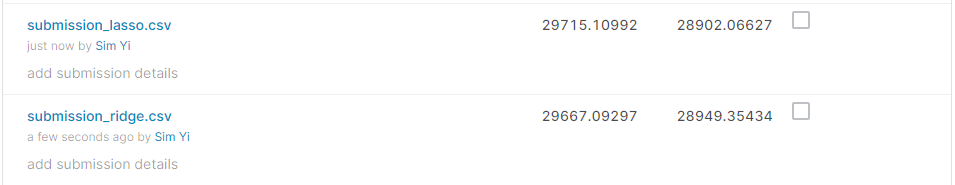

# 9. Analysis

In [95]:
coef_50 = coef[abs(coef).sort_values(ascending = False)[:50].keys()].sort_values(ascending = False)
coef_50

Neighborhood_GrnHill     109211.765611
Neighborhood_BrDale       30887.595439
Neighborhood_StoneBr      30620.617553
Condition 2_PosN          26482.041852
Neighborhood_NridgHt      26465.081171
Exterior 1st_BrkFace      20161.849071
Neighborhood_ClearCr      20073.887537
Neighborhood_NoRidge      18610.064717
Exterior 2nd_AsphShn      17657.789506
Total Flr SF              16816.016875
Bldg Type_2fmCon          14230.458456
Condition 1_PosA          14191.522347
MS Zoning_RH              13303.148512
Neighborhood_Somerst      13287.398200
Neighborhood_NPkVill      12970.031699
Bldg Type_1Fam            12449.366259
Land Contour_Low          12309.506703
Overall Total Value       11858.794026
Neighborhood_Crawfor      10715.167050
Condition 2_PosA          10663.511629
Condition 1_PosN          10601.991906
Land Contour_HLS          10510.883735
House Style_2.5Unf        10413.379286
Neighborhood_Timber        9209.911953
House Style_SFoyer         9086.952065
1st Flr SF               

In [96]:
[i for i in coef_50.keys().sort_values()]

['1st Flr SF',
 'Bldg Type_1Fam',
 'Bldg Type_2fmCon',
 'Bldg Type_Twnhs',
 'Bldg Type_TwnhsE',
 'Bsmt Qual',
 'Condition 1_PosA',
 'Condition 1_PosN',
 'Condition 1_RRAe',
 'Condition 1_RRNn',
 'Condition 2_PosA',
 'Condition 2_PosN',
 'Exterior 1st_BrkFace',
 'Exterior 1st_Stone',
 'Exterior 2nd_AsphShn',
 'Exterior 2nd_BrkFace',
 'Exterior 2nd_ImStucc',
 'Exterior 2nd_Stone',
 'Fireplace Total Value',
 'Garage Total Value',
 'Gr Liv Area',
 'Heating_Grav',
 'Heating_OthW',
 'Heating_Wall',
 'House Style_2.5Fin',
 'House Style_2.5Unf',
 'House Style_2Story',
 'House Style_SFoyer',
 'Land Contour_HLS',
 'Land Contour_Low',
 'MS Zoning_C (all)',
 'MS Zoning_RH',
 'Mas Vnr Type_BrkCmn',
 'Neighborhood_BrDale',
 'Neighborhood_ClearCr',
 'Neighborhood_Crawfor',
 'Neighborhood_Greens',
 'Neighborhood_GrnHill',
 'Neighborhood_NPkVill',
 'Neighborhood_NoRidge',
 'Neighborhood_NridgHt',
 'Neighborhood_Somerst',
 'Neighborhood_StoneBr',
 'Neighborhood_Timber',
 'Neighborhood_Veenker',
 'Overal

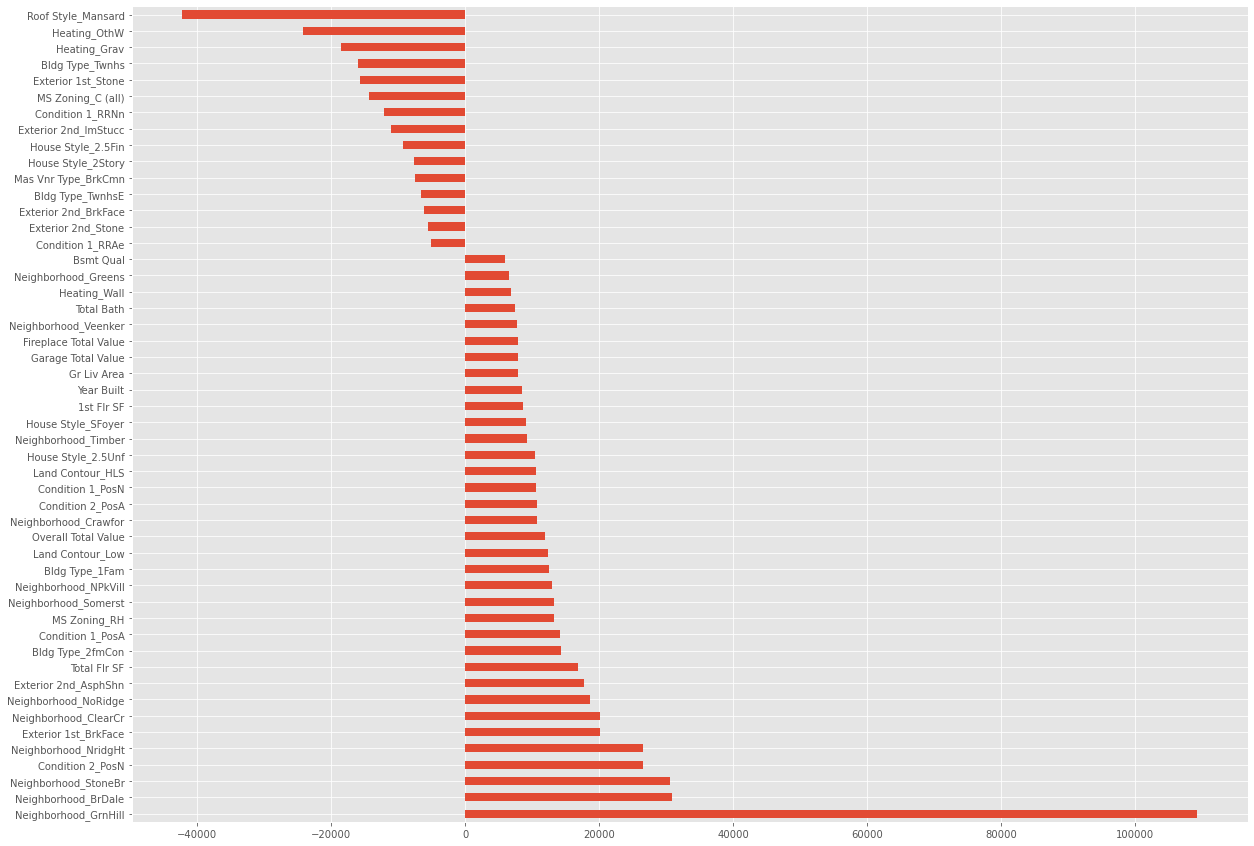

In [97]:
#looking at which features affect saleprice the most
plt.figure(figsize= (20, 15))
coef_50.plot(kind = 'barh');

# 9 comments 
- From a glance, it looks like the location where the house is built matters the most for saleprice
  - Neighborhood seems to affect salesprice the most
  - Condition of the house (Proximity to main road or railroad), where it is near to main and railroad on both conditions seems to improve saleprice


- will attempt to remove features that homeowners are unable to make changes to their house (e.g Neighborhood, Condition)


In [98]:
def Diff(li1, li2): 
    return (list(set(li1) - set(li2)))

In [99]:
positive_features = coef_50.sort_values(ascending = False)

In [100]:
coef_list = [i for i in (positive_features.keys().sort_values())] # creating list in alphabetical order to see relationship

In [101]:
coef_list[:] = [x for x in coef_list if 'Neigh' not in x] #removing Neighborhood features

In [102]:
coef_list[:] = [x for x in coef_list if 'Condition' not in x] #removing Condition features

In [103]:
coef_list[:] = [x for x in coef_list if 'Land' not in x] #removing Land contour features

In [104]:
sorted(Diff(coef_list,poly_test_features.columns))

['1st Flr SF',
 'Bldg Type_1Fam',
 'Bldg Type_2fmCon',
 'Bldg Type_Twnhs',
 'Bldg Type_TwnhsE',
 'Bsmt Qual',
 'Exterior 1st_BrkFace',
 'Exterior 1st_Stone',
 'Exterior 2nd_AsphShn',
 'Exterior 2nd_BrkFace',
 'Exterior 2nd_ImStucc',
 'Exterior 2nd_Stone',
 'Fireplace Total Value',
 'Garage Total Value',
 'Gr Liv Area',
 'Heating_Grav',
 'Heating_OthW',
 'Heating_Wall',
 'House Style_2.5Fin',
 'House Style_2.5Unf',
 'House Style_2Story',
 'House Style_SFoyer',
 'MS Zoning_C (all)',
 'MS Zoning_RH',
 'Mas Vnr Type_BrkCmn',
 'Overall Total Value',
 'Roof Style_Mansard',
 'Total Bath',
 'Total Flr SF',
 'Year Built']

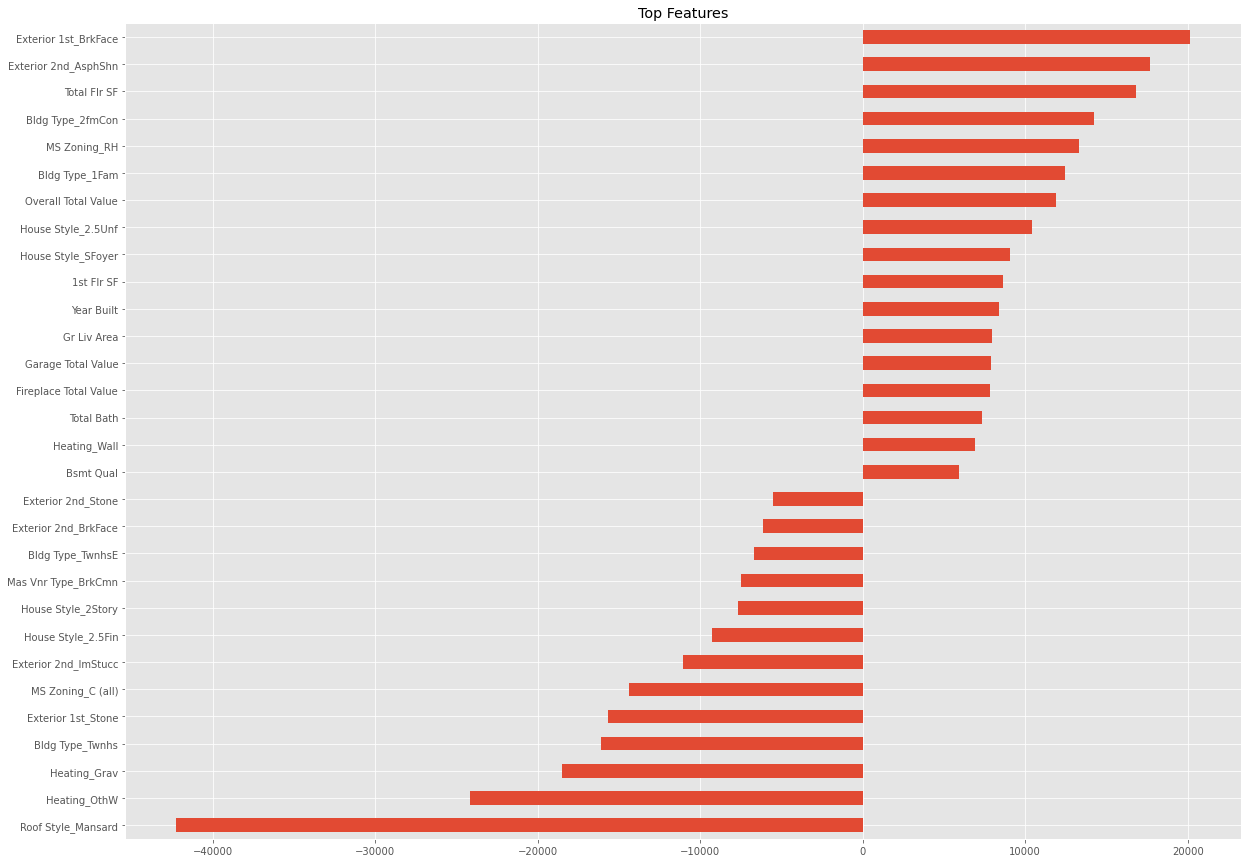

In [105]:
plt.figure(figsize= (20, 15))
plt.title('Top Features')
coef_50.loc[Diff(coef_list,poly_test_features.columns)].sort_values().plot(kind= 'barh');

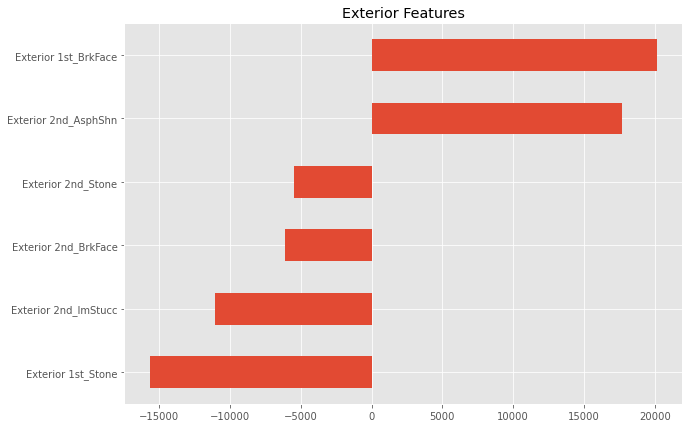

In [106]:
plt.figure(figsize= (10, 7))
plt.title('Exterior Features')
coef_50.loc[coef_50.filter(regex = 'Exter').keys()].sort_values(ascending = True).plot(kind = 'barh');

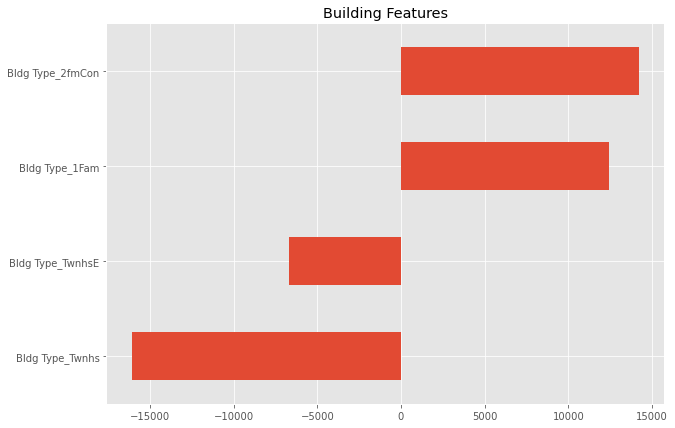

In [107]:
plt.figure(figsize= (10, 7))
plt.title('Building Features')
coef_50.loc[coef_50.filter(regex = 'Bldg').keys()].sort_values(ascending = True).plot(kind = 'barh');

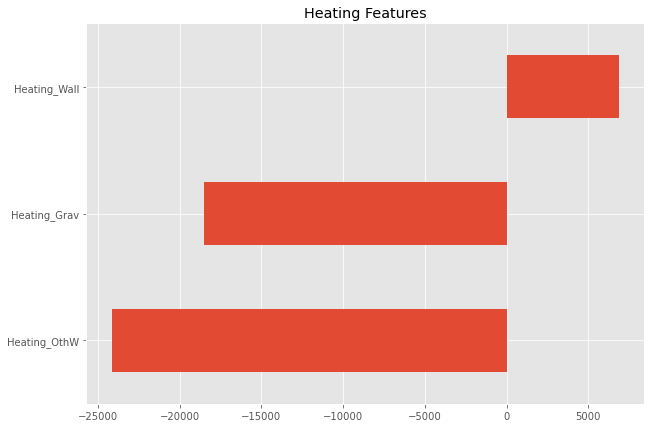

In [108]:
plt.figure(figsize= (10, 7))
plt.title('Heating Features')
coef_50.loc[coef_50.filter(regex = 'Heat').keys()].sort_values(ascending = True).plot(kind = 'barh');

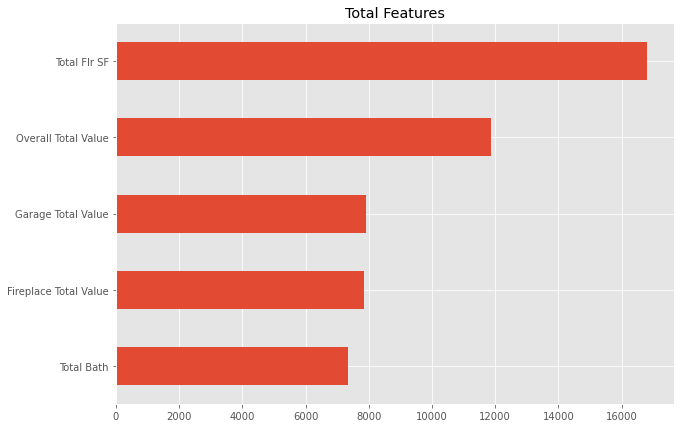

In [109]:
plt.figure(figsize= (10, 7))
plt.title('Total Features')
coef_50.loc[coef_50.filter(regex = 'Total').keys()].sort_values(ascending = True).plot(kind = 'barh');

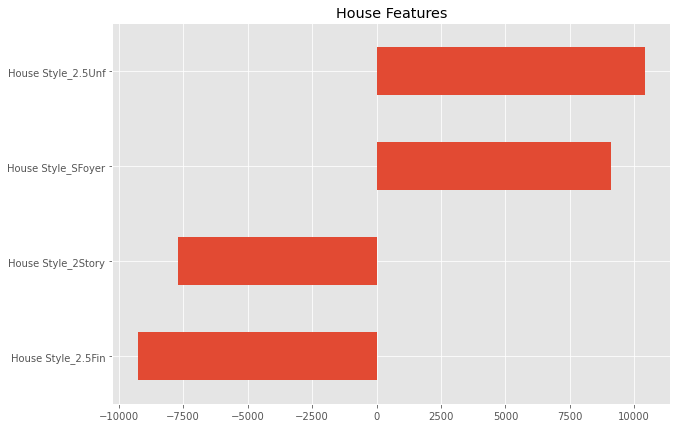

In [110]:
plt.figure(figsize= (10, 7))
plt.title('House Features')
coef_50.loc[coef_50.filter(regex = 'House').keys()].sort_values(ascending = True).plot(kind = 'barh');

# 10 Recommendations:

The Newer the house the better, 
Big houses prices higher


- Ames House buyers generally values luxury, quality and space of the houses


- Certain features enhancement will improve saleprice:
  - Heating, Fireplace, Garage


- Having a good exterior of the house will fetch a higher price


- The newer the house, the better the price